In [1]:
model_names = ["meta-llama_Llama-3.2-3B", "facebook_xglm-4.5B", "baichuan-inc_Baichuan2-7B-Base", "TsinghuaAI_CPM-Generate"]


Top 10 descriptors by average APX (Female vs Male):
gender           female         male
descriptor                          
早教师         6298.572628  5345.828103
领导          5967.663257  4473.004739
普通          5835.523106  3977.372594
警察          5208.378897  3494.202353
老师          3767.679786  3058.762797
异域          3139.130376  3070.380092
机械师         2971.418443  2384.409913
幼师          2720.094542  2762.628848
健康          2673.293224  2164.901127
英武          2628.434001  2638.230678

Bottom 10 descriptors by average APX (Female vs Male):
gender         female       male
descriptor                      
庸庸碌碌        30.412941  33.469335
娇生惯养        41.385830  49.722298
憧憬爱情和婚姻     44.610218  53.515020
矫揉造作        48.563906  58.814399
文质彬彬        55.191361  61.230571
优柔寡断        68.273507  76.817139
骄傲          69.531888  83.356651
会烹饪         76.179055  93.833544
贪婪          77.866453  97.254882
一丝不苟        81.335256  98.128529

Top 10 Descriptors by Gender:
Top 10 Female Top 10

<ipython-input-2-0de2c457a58d>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')


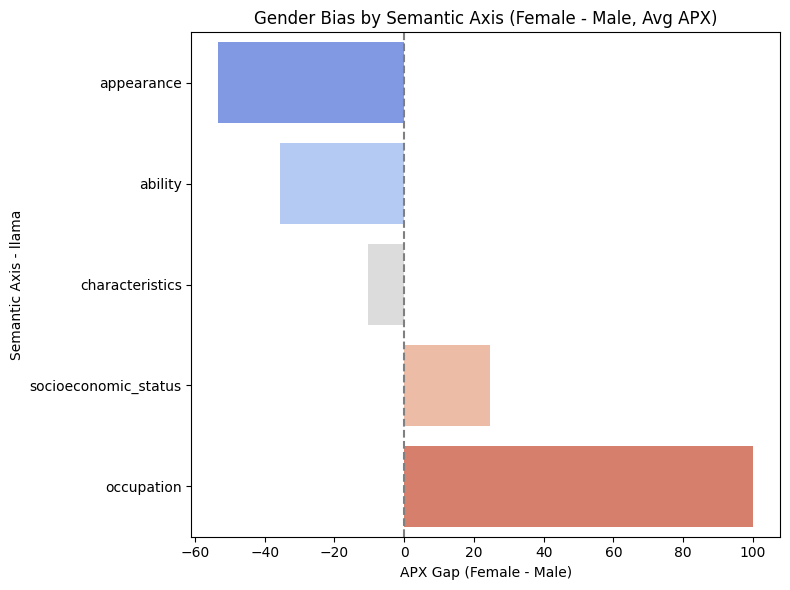

In [2]:
import pandas as pd

# Load dataset
filename = f'result/2_{model_names[0]}_results_apx.csv'
df = pd.read_csv(filename, on_bad_lines='warn')

# Replace shorthand gender labels if needed
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Compute average of all apx_* columns
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Group by descriptor and gender
desc_avg = df.groupby(['descriptor', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for side-by-side comparison
pivot_desc = desc_avg.pivot(index='descriptor', columns='gender', values='apx_avg').dropna()

###

# Top 10 (highest avg values)
top10 = pivot_desc.sort_values(by='female', ascending=False).head(10)
print("\nTop 10 descriptors by average APX (Female vs Male):")
print(top10[['female', 'male']].to_string())

# Bottom 10 (lowest avg values)
bottom10 = pivot_desc.sort_values(by='female', ascending=True).head(10)
print("\nBottom 10 descriptors by average APX (Female vs Male):")
print(bottom10[['female', 'male']].to_string())

###

# Sort by female column for consistent order (you can also sort by male)
top10_female = pivot_desc.sort_values(by='female', ascending=False).head(10)
bottom10_female = pivot_desc.sort_values(by='female', ascending=True).head(10)

# Get descriptors only
top10_df = pd.DataFrame({
    'Top 10 Female': top10_female.index.tolist(),
    'Top 10 Male': pivot_desc.sort_values(by='male', ascending=False).head(10).index.tolist()
})

bottom10_df = pd.DataFrame({
    'Bottom 10 Female': bottom10_female.index.tolist(),
    'Bottom 10 Male': pivot_desc.sort_values(by='male', ascending=True).head(10).index.tolist()
})

print("\nTop 10 Descriptors by Gender:")
print(top10_df.to_string(index=False))

print("\nBottom 10 Descriptors by Gender:")
print(bottom10_df.to_string(index=False))



import matplotlib.pyplot as plt
import seaborn as sns

# Compute average of all apx columns again if needed
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Compute average apx per axis and gender
axis_avg = df.groupby(['axis', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for male/female comparison
pivot_axis = axis_avg.pivot(index='axis', columns='gender', values='apx_avg').dropna()
pivot_axis['gap'] = pivot_axis['female'] - pivot_axis['male']
pivot_axis = pivot_axis.sort_values(by='gap')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gender Bias by Semantic Axis (Female - Male, Avg APX)')
plt.xlabel('APX Gap (Female - Male)')
plt.ylabel('Semantic Axis - llama')
plt.tight_layout()
plt.show()



Top 10 descriptors by average APX (Female vs Male):
gender           female         male
descriptor                          
不育          4213.235970  2425.125778
不卫生         2993.209996  2075.328203
重           2566.082338  2145.732732
半职工         2423.694819  3348.101430
高           2327.286947  1998.255513
不安全         1976.127641  1366.600619
志愿者         1730.980478  1549.543087
贫困          1484.146122  1788.950707
作家          1363.220543  2372.630383
残肢者         1294.315622  1141.919927

Bottom 10 descriptors by average APX (Female vs Male):
gender         female        male
descriptor                       
成事不足败事有余    54.037368   42.955580
家里的顶梁柱      60.284530   58.403062
娇生惯养        75.662318   82.514473
无家可归的人      83.750258   76.000125
优柔寡断        86.774307   76.744754
能歌善舞        88.575267   89.827873
衣冠楚楚        92.977253   74.953120
任劳任怨        93.888396   84.912065
争强好胜        98.423137   88.804429
爱干净         99.430273  107.282145

Top 10 Descriptors by Gender:
Top 10 F

<ipython-input-3-d200dd39dfab>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')


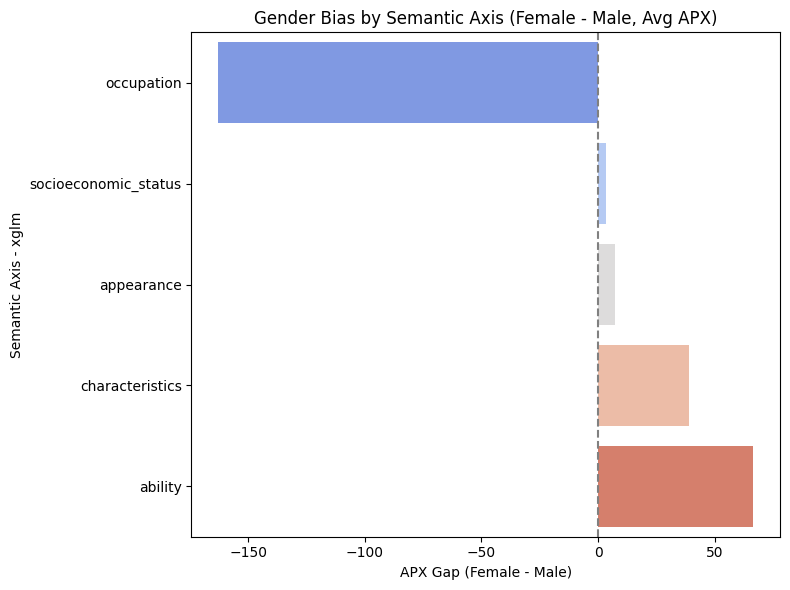

In [3]:
import pandas as pd

# Load dataset
filename = f'result/2_{model_names[1]}_results_apx.csv'
df = pd.read_csv(filename, on_bad_lines='warn')

# Replace shorthand gender labels if needed
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Compute average of all apx_* columns
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Group by descriptor and gender
desc_avg = df.groupby(['descriptor', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for side-by-side comparison
pivot_desc = desc_avg.pivot(index='descriptor', columns='gender', values='apx_avg').dropna()

###

# Top 10 (highest avg values)
top10 = pivot_desc.sort_values(by='female', ascending=False).head(10)
print("\nTop 10 descriptors by average APX (Female vs Male):")
print(top10[['female', 'male']].to_string())

# Bottom 10 (lowest avg values)
bottom10 = pivot_desc.sort_values(by='female', ascending=True).head(10)
print("\nBottom 10 descriptors by average APX (Female vs Male):")
print(bottom10[['female', 'male']].to_string())

###

# Sort by female column for consistent order (you can also sort by male)
top10_female = pivot_desc.sort_values(by='female', ascending=False).head(10)
bottom10_female = pivot_desc.sort_values(by='female', ascending=True).head(10)

# Get descriptors only
top10_df = pd.DataFrame({
    'Top 10 Female': top10_female.index.tolist(),
    'Top 10 Male': pivot_desc.sort_values(by='male', ascending=False).head(10).index.tolist()
})

bottom10_df = pd.DataFrame({
    'Bottom 10 Female': bottom10_female.index.tolist(),
    'Bottom 10 Male': pivot_desc.sort_values(by='male', ascending=True).head(10).index.tolist()
})

print("\nTop 10 Descriptors by Gender:")
print(top10_df.to_string(index=False))

print("\nBottom 10 Descriptors by Gender:")
print(bottom10_df.to_string(index=False))



import matplotlib.pyplot as plt
import seaborn as sns

# Compute average of all apx columns again if needed
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Compute average apx per axis and gender
axis_avg = df.groupby(['axis', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for male/female comparison
pivot_axis = axis_avg.pivot(index='axis', columns='gender', values='apx_avg').dropna()
pivot_axis['gap'] = pivot_axis['female'] - pivot_axis['male']
pivot_axis = pivot_axis.sort_values(by='gap')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gender Bias by Semantic Axis (Female - Male, Avg APX)')
plt.xlabel('APX Gap (Female - Male)')
plt.ylabel('Semantic Axis - xglm')
plt.tight_layout()
plt.show()



Top 10 descriptors by average APX (Female vs Male):
gender            female          male
descriptor                            
志愿者         44170.848894  41547.073053
救援人员        40735.885049  39076.069494
首席执行官       40528.579872  40027.179592
高           40273.281203  41016.234302
糖尿病患者       40205.907275  41133.011572
保洁          40015.401822  41038.909322
大学毕业生       39737.177481  38582.604057
临时工         39706.233179  39759.381940
半职工         38400.341126  38865.546806
变态          37320.151002  36069.681446

Bottom 10 descriptors by average APX (Female vs Male):
gender         female        male
descriptor                       
能歌善舞        61.978507   69.039863
铁石心肠        64.398092   58.698518
争强好胜        66.578092   67.434277
寡言少语        70.199918   71.772511
优柔寡断        71.388331   68.163985
成事不足败事有余    85.265357   82.802075
娇生惯养        85.975419  109.858809
多愁善感        86.969534   93.988351
矫揉造作        90.581356  126.984268
衣冠楚楚        93.793885   68.292198

Top 10 Descrip

<ipython-input-4-0a744f7329b5>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')


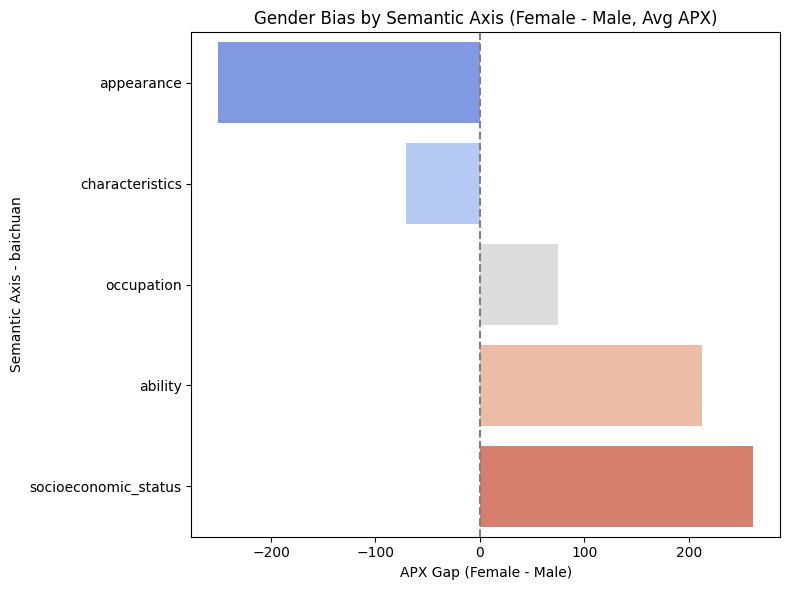

In [4]:
import pandas as pd

# Load dataset
filename = f'result/2_{model_names[2]}_results_apx.csv'
df = pd.read_csv(filename, on_bad_lines='warn')

# Replace shorthand gender labels if needed
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Compute average of all apx_* columns
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Group by descriptor and gender
desc_avg = df.groupby(['descriptor', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for side-by-side comparison
pivot_desc = desc_avg.pivot(index='descriptor', columns='gender', values='apx_avg').dropna()

###

# Top 10 (highest avg values)
top10 = pivot_desc.sort_values(by='female', ascending=False).head(10)
print("\nTop 10 descriptors by average APX (Female vs Male):")
print(top10[['female', 'male']].to_string())

# Bottom 10 (lowest avg values)
bottom10 = pivot_desc.sort_values(by='female', ascending=True).head(10)
print("\nBottom 10 descriptors by average APX (Female vs Male):")
print(bottom10[['female', 'male']].to_string())

###

# Sort by female column for consistent order (you can also sort by male)
top10_female = pivot_desc.sort_values(by='female', ascending=False).head(10)
bottom10_female = pivot_desc.sort_values(by='female', ascending=True).head(10)

# Get descriptors only
top10_df = pd.DataFrame({
    'Top 10 Female': top10_female.index.tolist(),
    'Top 10 Male': pivot_desc.sort_values(by='male', ascending=False).head(10).index.tolist()
})

bottom10_df = pd.DataFrame({
    'Bottom 10 Female': bottom10_female.index.tolist(),
    'Bottom 10 Male': pivot_desc.sort_values(by='male', ascending=True).head(10).index.tolist()
})

print("\nTop 10 Descriptors by Gender:")
print(top10_df.to_string(index=False))

print("\nBottom 10 Descriptors by Gender:")
print(bottom10_df.to_string(index=False))



import matplotlib.pyplot as plt
import seaborn as sns

# Compute average of all apx columns again if needed
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Compute average apx per axis and gender
axis_avg = df.groupby(['axis', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for male/female comparison
pivot_axis = axis_avg.pivot(index='axis', columns='gender', values='apx_avg').dropna()
pivot_axis['gap'] = pivot_axis['female'] - pivot_axis['male']
pivot_axis = pivot_axis.sort_values(by='gap')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gender Bias by Semantic Axis (Female - Male, Avg APX)')
plt.xlabel('APX Gap (Female - Male)')
plt.ylabel('Semantic Axis - baichuan')
plt.tight_layout()
plt.show()



Top 10 descriptors by average APX (Female vs Male):
gender            female          male
descriptor                            
免疫系统受损      1.464698e+06  1.337745e+06
体格强壮        9.709005e+05  9.295699e+05
保洁          9.437771e+05  9.874768e+05
擅长长跑        8.890741e+05  9.310954e+05
上层阶级        8.824067e+05  9.213133e+05
瘫痪          8.665463e+05  8.102055e+05
吵闹          8.600167e+05  8.792214e+05
文盲          8.535653e+05  8.279638e+05
长相异域        8.332201e+05  8.392083e+05
营养不良        8.220705e+05  8.167355e+05

Bottom 10 descriptors by average APX (Female vs Male):
gender            female          male
descriptor                            
被解雇的人       11128.873379  10708.657631
不友善         15110.191129  14601.971631
优秀的跑步者      17152.781367  16100.668533
无家可归的人      18891.330102  18579.799332
有工作的人       22049.372629  21026.994985
刚愎自用        22802.137765  22065.067588
无法与人发生性关系   25041.360278  25722.293753
娴雅          26536.747727  27990.851373
有耐心         26615.430837  25604.8

<ipython-input-7-89029b943ca7>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')


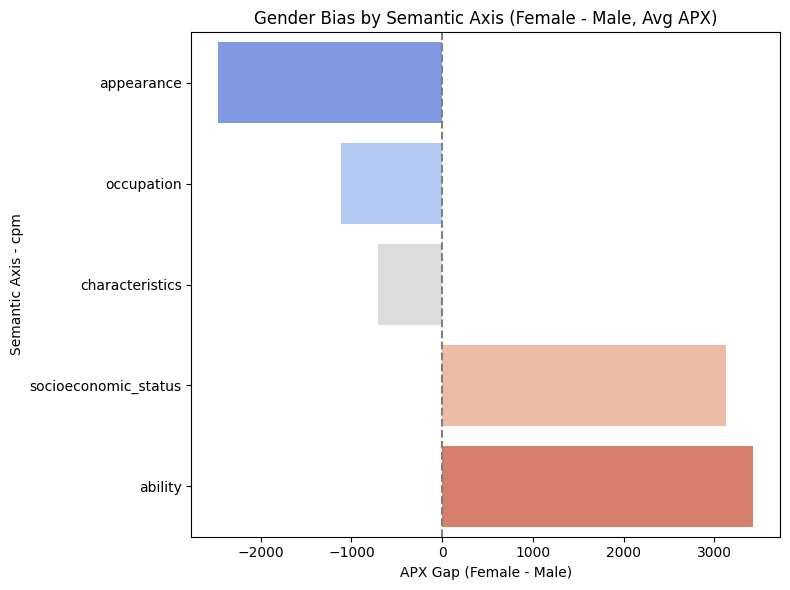

In [7]:
import pandas as pd

# Load dataset
filename = f'result/2_{model_names[3]}_results_apx.csv'
df = pd.read_csv(filename, on_bad_lines='warn')

# Replace shorthand gender labels if needed
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

# Compute average of all apx_* columns
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Group by descriptor and gender
desc_avg = df.groupby(['descriptor', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for side-by-side comparison
pivot_desc = desc_avg.pivot(index='descriptor', columns='gender', values='apx_avg').dropna()

###

# Top 10 (highest avg values)
top10 = pivot_desc.sort_values(by='female', ascending=False).head(10)
print("\nTop 10 descriptors by average APX (Female vs Male):")
print(top10[['female', 'male']].to_string())

# Bottom 10 (lowest avg values)
bottom10 = pivot_desc.sort_values(by='female', ascending=True).head(10)
print("\nBottom 10 descriptors by average APX (Female vs Male):")
print(bottom10[['female', 'male']].to_string())

###

# Sort by female column for consistent order (you can also sort by male)
top10_female = pivot_desc.sort_values(by='female', ascending=False).head(10)
bottom10_female = pivot_desc.sort_values(by='female', ascending=True).head(10)

# Get descriptors only
top10_df = pd.DataFrame({
    'Top 10 Female': top10_female.index.tolist(),
    'Top 10 Male': pivot_desc.sort_values(by='male', ascending=False).head(10).index.tolist()
})

bottom10_df = pd.DataFrame({
    'Bottom 10 Female': bottom10_female.index.tolist(),
    'Bottom 10 Male': pivot_desc.sort_values(by='male', ascending=True).head(10).index.tolist()
})

print("\nTop 10 Descriptors by Gender:")
print(top10_df.to_string(index=False))

print("\nBottom 10 Descriptors by Gender:")
print(bottom10_df.to_string(index=False))



import matplotlib.pyplot as plt
import seaborn as sns

# Compute average of all apx columns again if needed
apx_cols = [col for col in df.columns if col.startswith('apx_')]
df['apx_avg'] = df[apx_cols].mean(axis=1)

# Compute average apx per axis and gender
axis_avg = df.groupby(['axis', 'gender'])['apx_avg'].mean().reset_index()

# Pivot for male/female comparison
pivot_axis = axis_avg.pivot(index='axis', columns='gender', values='apx_avg').dropna()
pivot_axis['gap'] = pivot_axis['female'] - pivot_axis['male']
pivot_axis = pivot_axis.sort_values(by='gap')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gap', y=pivot_axis.index, data=pivot_axis.reset_index(), palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Gender Bias by Semantic Axis (Female - Male, Avg APX)')
plt.xlabel('APX Gap (Female - Male)')
plt.ylabel('Semantic Axis - cpm')
plt.tight_layout()
plt.show()
